## 二维拓扑光子晶体能带计算
2023-04-29

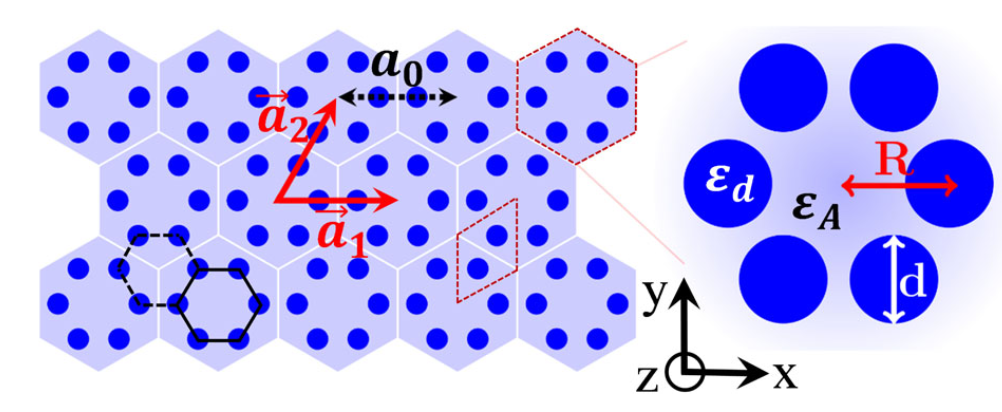

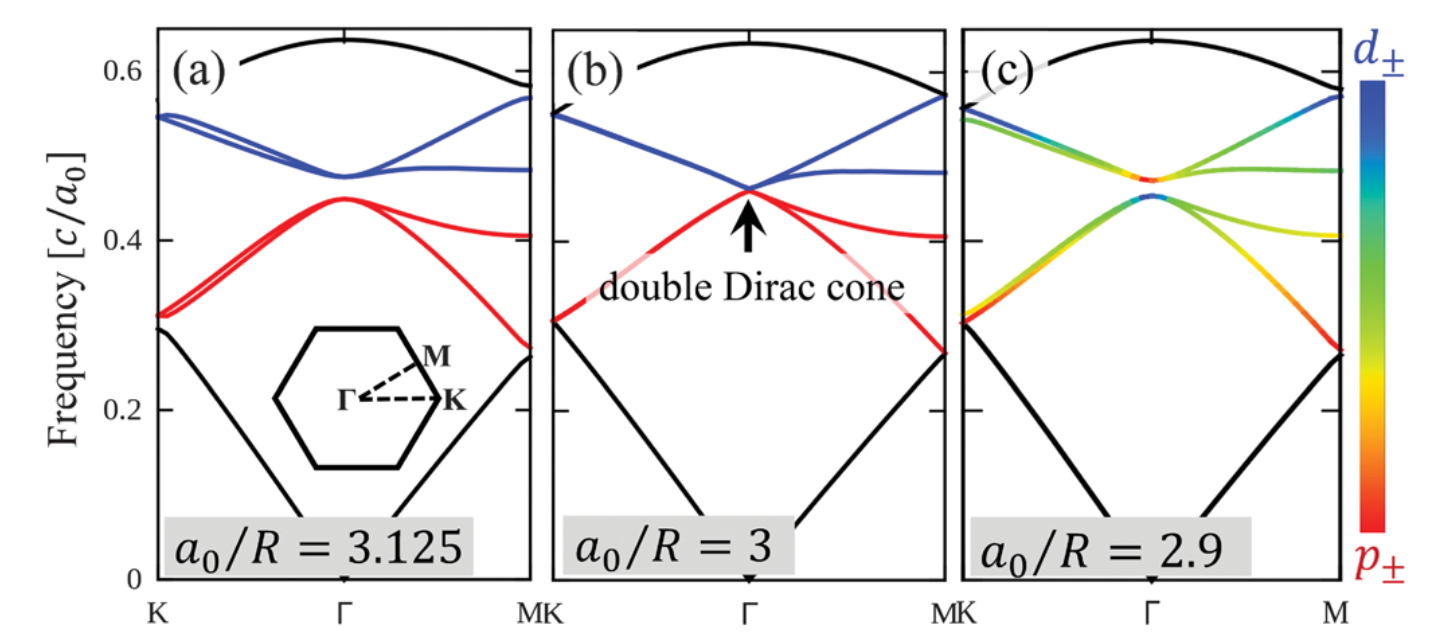

我们需要用到倒格矢与原基矢量的关系：

$$
\left\{\begin{matrix}  \boldsymbol{b}_1=\frac{2\pi  \boldsymbol{a}_2\times \boldsymbol{a}_3}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \\  \boldsymbol{b}_2=\frac{2\pi  \boldsymbol{a}_3\times \boldsymbol{a}_1}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \\  \boldsymbol{b}_3=\frac{2\pi  \boldsymbol{a}_1\times \boldsymbol{a}_2}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \end{matrix}\right.\\
$$
其中分母的物理意义代表着原胞的体积。计算图中结构时，需要首先确定最小原胞，可以有多种选取方式，按照图中的选取方法，最小原胞是一个平行四边形，原胞的两个基矢为

$$
a_{1}=(\frac{1}{2},\frac{\sqrt{3}}{2})a,a_{2}=(1,0)a
$$


按照图中的定义，可以计算出倒格子空间的矢量为

$$
b_{1}=(0,\frac{2}{\sqrt{3}})\frac{2\pi}{a},\\
b_{2}=(1,-\frac{1}{\sqrt{3}})\frac{2\pi}{a}
$$

我们计算能带，需要改变波矢来求频率本征值，按照图中的定义，$\Gamma$点为$(0,0)\frac{2\pi}{a}$，$K,M$点从图中也可以直接看出来，为

$$
K=(\frac{2}{3},0)\frac{2\pi}{a}=\frac{1}{3}b_{1}+\frac{2}{3}b_{2}
$$

$$
M=(\frac{1}{2},\frac{\sqrt{3}}{6})\frac{2\pi}{a}=\frac{1}{2}b_{1}+\frac{1}{2}b_{2}
$$

到此，所有的准备工作就做完了，接下来可以进行代码实现了。 我们选取的原胞如下图所示

In [5]:
import math
import meep as mp
from meep import mpb
import numpy as np
import matplotlib.pyplot as plt

num_bands = 8

# 定义好扫描的k波矢
k_points = [mp.Vector3(1/3,2/3),   # K
            mp.Vector3(),          # Gamma
            mp.Vector3(0.5,0.5),   # M
            mp.Vector3(1/3,2/3)]   # Gamma

# 对k波矢进行插值
k_points = mp.interpolate(40, k_points)

#  units of nm
a=1  # Lattice constants
eta=4
R=a/eta # radius of hexagonal shape

d=2/3*R # radius of rod

# 基本结构和材料性质
# 折射率设置
nslab = np.sqrt(11.7)
slab = mp.Medium(index=nslab)

nair = 1
air = mp.Medium(index=nair)


# geometry = [mp.Cylinder(d/2,center=mp.Vector3(-R*0.5,-R*math.sqrt(3)/2), material=slab),
#             mp.Cylinder(d/2,center=mp.Vector3(R*0.5,R*math.sqrt(3)/2), material=slab)]
geometry = [mp.Cylinder(d/2,center=mp.Vector3(-R*0.5,-R*0.5), material=slab),
            mp.Cylinder(d/2,center=mp.Vector3(R*0.5,R*0.5), material=slab)]


geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis1=mp.Vector3(0.5, np.sqrt(3) / 2),
    basis2=mp.Vector3(1, 0),
)


resolution = 32

# mode solver设置
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (1, 0, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (-0, 1.1547, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (-0.125,-0.125,0)
          radius 0.0833333, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.125,0.125,0)
          radius 0.0833333, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 2 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
124 k-points
  Vector3<0.3333333333333333, 0.6666666666666666, 0.0>
  Vector3<0.3252032520325203, 0.6504065040650406, 0.0>
  Vector3<0.3170731707317073, 0.6341463414634146, 0.0>
  Vector3<0.308943

    iteration    3: trace = 8.053731035777506 (17.5949% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 7.678542193541725 (4.76967% change)
    linmin: converged after 4 iterations.
    iteration    5: trace = 7.617506437046259 (0.798059% change)
    linmin: converged after 4 iterations.
    iteration    6: trace = 7.598434916742635 (0.250678% change)
    linmin: converged after 4 iterations.
    iteration    7: trace = 7.583913061922376 (0.191299% change)
    linmin: converged after 3 iterations.
    iteration    8: trace = 7.560852190652287 (0.304539% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 7.533119773381806 (0.367463% change)
    linmin: converged after 4 iterations.
    iteration   10: trace = 7.51727688283416 (0.210531% change)
    linmin: converged after 4 iterations.
    iteration   11: trace = 7.508978528053408 (0.110451% change)
    linmin: converged after 4 iterations.
    iteration   12: trace = 7.5055146605

    linmin: converged after 4 iterations.
    iteration    5: trace = 7.508238639421706 (0.00225361% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.508203904951072 (0.000462619% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.508198173117341 (7.6341e-05% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 7.508195618079859 (3.403e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 7.508194712527486 (1.20609e-05% change)
    linmin: converged after 2 iterations.
    iteration   10: trace = 7.508194522270456 (2.53399e-06% change)
Finished solving for bands 1 to 8 after 10 iterations.
tmfreqs:, 6, 0.292683, 0.585366, 0, 0.585366, 0.420493, 0.484788, 0.673682, 0.913228, 1.05041, 1.18373, 1.25263, 1.31714
elapsed time for k point: 0.08071660995483398
solve_kpoint (0.284553,0.569106,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration   

    linmin: converged after 2 iterations.
    iteration    3: trace = 7.460956253344731 (0.00100195% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.460915249429775 (0.000549581% change)
    linmin: converged after 3 iterations.
    iteration    5: trace = 7.460895754814883 (0.00026129% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.460891571206922 (5.60738e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.460891057337308 (6.88751e-06% change)
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 13, 0.235772, 0.471545, 0, 0.471545, 0.359307, 0.511257, 0.712604, 0.913975, 1.03256, 1.2019, 1.23177, 1.30356
elapsed time for k point: 0.09501457214355469
solve_kpoint (0.227642,0.455285,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.452728691442918 (0.0137089% change)
    linmin: converged after 2 iterations.
    iteration    

    iteration    3: trace = 7.399760238416031 (0.000396428% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.399754892249208 (7.22479e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.39975332770836 (2.11431e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.399753016609425 (4.20418e-06% change)
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 21, 0.170732, 0.341463, 0, 0.341463, 0.268435, 0.545792, 0.756134, 0.929729, 1.02267, 1.18723, 1.23603, 1.26906
elapsed time for k point: 0.09438419342041016
solve_kpoint (0.162602,0.325203,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.394330615591665 (0.0120618% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.394137447904573 (0.00261241% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.394109783390123 (0.000374142

    linmin: converged after 2 iterations.
    iteration    1: trace = 7.375955548811936 (0.0108829% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.375786301053227 (0.00229461% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.375759606807462 (0.000361918% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.375754315565445 (7.17383e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.37575271808236 (2.16586e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.375752460697625 (3.48961e-06% change)
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 30, 0.097561, 0.195122, 0, 0.195122, 0.156118, 0.576124, 0.782369, 0.97989, 1.02934, 1.13721, 1.20272, 1.28368
elapsed time for k point: 0.08848166465759277
solve_kpoint (0.0894309,0.178862,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration   

    iteration    4: trace = 7.409394938711976 (0.0010693% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.409380378716202 (0.000196507% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.409378871753768 (2.03386e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.409378655896486 (2.9133e-06% change)
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 38, 0.0325203, 0.0650407, 0, 0.0650407, 0.052385, 0.590218, 0.788948, 1.03805, 1.05194, 1.0937, 1.14559, 1.32029
elapsed time for k point: 0.16697239875793457
solve_kpoint (0.0243902,0.0487805,0):
Solving for bands 1 to 8...
    linmin: converged after 3 iterations.
    iteration    1: trace = 7.415750607818743 (0.0130009% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.415357556845834 (0.00530036% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.415123321459971 (0.00315884

Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.407754708493258 (0.0113745% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 7.407347355667131 (0.00549916% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 7.407141793930273 (0.00277514% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.40706201766913 (0.00107702% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.407051808030223 (0.000137837% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.407050866647176 (1.27093e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.407050765459334 (1.3661e-06% change)
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 46, 0.0487805, 0.0487805, 0, 0.0563269, 0.0453758, 0.590442, 0.790045, 1.03931, 1.05155, 1.09518, 1.14168, 1.32038
elapsed time for k point: 0.30

    linmin: converged after 2 iterations.
    iteration    5: trace = 7.359676008721596 (8.94112e-06% change)
Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 54, 0.146341, 0.146341, 0, 0.168981, 0.135465, 0.578108, 0.79283, 0.993658, 1.01281, 1.14048, 1.188, 1.28584
elapsed time for k point: 0.24570727348327637
solve_kpoint (0.158537,0.158537,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.356782092690766 (0.00774179% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.356667038369017 (0.00156393% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.356653918588989 (0.000178339% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.35665223993364 (2.28182e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.356651820212601 (5.70533e-06% change)
Finished solving for bands 1 to 8 after 5 iterations.
tmfreq

Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 64, 0.268293, 0.268293, 0, 0.309798, 0.244876, 0.546146, 0.79166, 0.943069, 0.974758, 1.19272, 1.23301, 1.26351
elapsed time for k point: 0.08357548713684082
solve_kpoint (0.280488,0.280488,0):
Solving for bands 1 to 8...
    linmin: converged after 3 iterations.
    iteration    1: trace = 7.368218699459 (0.00844284% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.36808630838263 (0.0017968% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.368073282120437 (0.000176793% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.368072072803131 (1.64129e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.368071856145594 (2.94049e-06% change)
Finished solving for bands 1 to 8 after 5 iterations.
tmfreqs:, 65, 0.280488, 0.280488, 0, 0.323879, 0.255496, 0.541905, 0.790851, 0.939499, 0.971711, 1.1973, 1.23214, 1.2

    iteration    1: trace = 7.424916278979053 (0.0104337% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.424699175695814 (0.00292403% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 7.424664106119368 (0.000472338% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.424654112300794 (0.000134603% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 61.1819%)
    iteration    5: trace = 7.424652489293328 (2.18597e-05% change)
    switching back to exact line minimization
    iteration    6: trace = 7.424652372159353 (1.57764e-06% change)
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 74, 0.390244, 0.390244, 0, 0.450615, 0.346975, 0.494228, 0.779647, 0.920564, 0.951288, 1.21403, 1.22967, 1.30913
elapsed time for k point: 0.13763117790222168
solve_kpoint (0.402439,0.402439,0):
Solving for bands 1 to 8...
    linmin: converg

    iteration    4: trace = 7.465419340346546 (0.000574593% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.465415035095232 (5.76693e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.465414776026051 (3.47026e-06% change)
Finished solving for bands 1 to 8 after 6 iterations.
tmfreqs:, 82, 0.487805, 0.487805, 0, 0.563269, 0.418106, 0.438298, 0.773044, 0.916765, 0.944404, 1.20632, 1.24124, 1.33141
elapsed time for k point: 0.08215713500976562
solve_kpoint (0.5,0.5,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.46671224480371 (0.0139789% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.466268840131616 (0.0059386% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.466137627618874 (0.00175742% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.466093473822626 (0.000591389% change)
 

    linmin: converged after 2 iterations.
    iteration    3: trace = 7.475053230780466 (3.5328e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.47505305498809 (2.35172e-06% change)
Finished solving for bands 1 to 8 after 4 iterations.
tmfreqs:, 93, 0.45935, 0.54065, 0, 0.583046, 0.42468, 0.437622, 0.758296, 0.916266, 0.958288, 1.20405, 1.24276, 1.33272
elapsed time for k point: 0.03954815864562988
solve_kpoint (0.455285,0.544715,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.476958935086733 (0.00289555% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.476933121879064 (0.000345237% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.476930469243074 (3.54776e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.476930291073502 (2.38292e-06% change)
Finished solving for bands 1 to 8 after 4 iterations.
tmfre

Finished solving for bands 1 to 8 after 4 iterations.
tmfreqs:, 104, 0.414634, 0.585366, 0, 0.602065, 0.430889, 0.449035, 0.72117, 0.915013, 0.993881, 1.19687, 1.24716, 1.33603
elapsed time for k point: 0.08322286605834961
solve_kpoint (0.410569,0.589431,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.509148891573424 (0.00291471% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.509120842911203 (0.000373527% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.509117911637094 (3.90362e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.509117632256897 (3.72055e-06% change)
Finished solving for bands 1 to 8 after 4 iterations.
tmfreqs:, 105, 0.410569, 0.589431, 0, 0.604421, 0.431514, 0.450423, 0.717403, 0.914889, 0.99755, 1.19599, 1.24769, 1.33645
elapsed time for k point: 0.048920392990112305
solve_kpoint (0.406504,0.593496,0):
Solving for ba

Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.561747636368944 (0.00294966% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.561715179446008 (0.000429226% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 7.561711164879307 (5.30907e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.561710450914444 (9.44184e-06% change)
Finished solving for bands 1 to 8 after 4 iterations.
tmfreqs:, 116, 0.365854, 0.634146, 0, 0.636643, 0.436158, 0.468833, 0.677704, 0.913926, 1.03847, 1.18453, 1.25452, 1.34231
elapsed time for k point: 0.0533299446105957
solve_kpoint (0.361789,0.638211,0):
Solving for bands 1 to 8...
    linmin: converged after 2 iterations.
    iteration    1: trace = 7.567482712320412 (0.00295591% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 7.567449607081894 (0.000437468% change)
    linmin: converged after 

    linmin: converged after 3 iterations.
    iteration   24: trace = 7.603078113204715 (0.000148797% change)
    linmin: converged after 3 iterations.
    iteration   25: trace = 7.603066791597624 (0.000148908% change)
    linmin: converged after 3 iterations.
    iteration   26: trace = 7.60305544905456 (0.000149184% change)
    linmin: converged after 3 iterations.
    iteration   27: trace = 7.603044073550485 (0.000149618% change)
    linmin: converged after 3 iterations.
    iteration   28: trace = 7.603032653435182 (0.000150205% change)
    linmin: converged after 3 iterations.
    iteration   29: trace = 7.603021177367784 (0.000150941% change)
    linmin: converged after 3 iterations.
    iteration   30: trace = 7.603009634256848 (0.000151823% change)
    linmin: converged after 3 iterations.
    iteration   31: trace = 7.602998013205111 (0.000152848% change)
    linmin: converged after 3 iterations.
    iteration   32: trace = 7.602986303458856 (0.000154015% change)
    linmin:

[Text(0.0, 0, 'K'),
 Text(41.0, 0, 'Γ'),
 Text(82.0, 0, 'M'),
 Text(123.0, 0, 'K')]

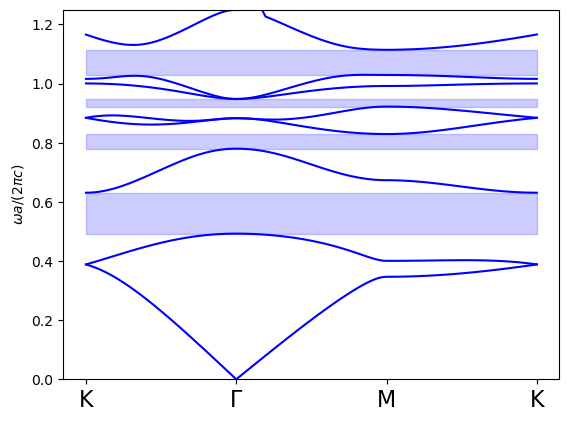

In [3]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(tm_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(tm_freqs))

for l in range(num_bands):
    plt.plot(tm_freqs[:,l],'b-')
plt.ylim([0,1.25])
plt.ylabel('$\omega a/(2\pi c)$')

# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)


points_in_between = (len(tm_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['K', 'Γ', 'M', 'K']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)

epsilon: 1-11.7, mean 1.5391, harm. mean 1.0641, 7.61719% > 1, 5.03831% "fill"
real part range: 1 .. 11.7


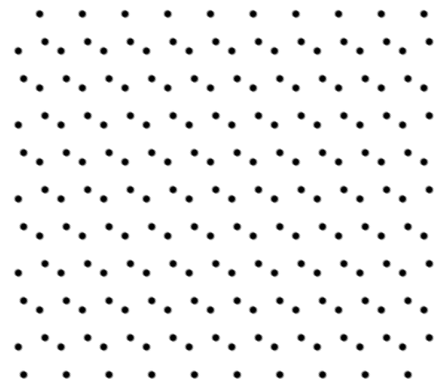

In [6]:
md = mpb.MPBData(rectify=True, periods=10, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()